In [69]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import pandas as pd
import random
import ast
import glob

from pprint import pprint

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
#from gensim.models import CoherenceModel
from gensim.models import LdaModel, CoherenceModel, LdaMulticore

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [70]:
#set seed so that code output is deterministic
random.seed(100)  # Set the seed for Python's random module
np.random.seed(100)  # Set the seed for NumPy's random module

In [71]:
#import data
def list_converter(text):
    #to revert list->str conversion from pd.read_csv
    return ast.literal_eval(text)

#load data into dataframe
data = pd.read_csv('Data/filtered_corpus.csv', converters ={'tokens':list_converter,
                                                           'updated_tokens': list_converter})

#remove unnecessary column - index
data = data.drop(columns = ['index'])
print (data.shape)
data.head()

(95028, 8)


,text_type,ID,year,long_text,clean_text,word_count,tokens,updated_tokens
0,comment,gtfo2hl,2021,"*Cuntry roads, take me hoem*",cuntry roads hoem,3,"[cuntry, road, hoem]",[road]
1,comment,gtfou07,2021,I am single and I have not traveled to any cun...,single traveled cuntry past year,5,"[single, travel, cuntry, past, year]","[single, travel, past]"
2,comment,gtfrgpe,2021,What happens when you shop at dragon mart...,happens shop dragon mart,4,"[happen, shop, dragon, mart]","[shop, dragon, mart]"
3,comment,gthiiwi,2021,"That’s just absolutely hilarious, is this in t...",absolutely hilarious springs souk,4,"[absolutely, hilarious, spring, souk]","[hilarious, spring, souk]"
4,comment,gtfw6yj,2021,Eugene's first day as a signwriter for Country...,eugene s day signwriter country artificial pro...,8,"[eugene, s, day, signwriter, country, artifici...","[artificial, product]"


In [72]:
#load tfidf vectorizer and vectors
#vectorizer so that we can access the feature names/words

import pickle
with open('pretrained_models/tfidf/tfidf_filtered_vectors.pkl', 'rb') as file:
    tfidf_vectors = pickle.load(file)
    
with open('pretrained_models/tfidf/tfidf_vectorizer.pkl', 'rb') as file:
    tfidf = pickle.load(file)

In [73]:
#unique words in corpus

words = tfidf.get_feature_names_out()
print('Number of unique words in corpus:', len(words) )
print ('Number of documents:', tfidf_vectors.shape[0])

Number of unique words in corpus: 6766
Number of documents: 70196


## **TRAIN LDA MODEL**

In [74]:
#create gensim dictionary from TF-IDF 
dictionary = corpora.Dictionary([words])

id2word = {indx: term for term, indx in tfidf.vocabulary_.items()}

In [75]:
#create gensim corpus from TF-IDF vectors
from gensim.matutils import Sparse2Corpus
gensim_corpus = Sparse2Corpus(tfidf_vectors, documents_columns = False)

In [82]:
#lda model
#from gensim documentation at https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/?expand_article=1#9createbigramandtrigrammodels
#https://github.com/clevyclev/Deep-Learning-Projects/blob/master/Latent%20Dirichlet%20Allocation%20-%20Bag%20of%20Words%20and%20TF-IDF/Latent_dirichlet_allocation.py

#training parameters
num_topics = 9
chunksize = 100
passes = 20
iterations = 400
eval_every = None

#range of topics
topics_range + range (2,20,2)

#list to hold coherence value

model_coherence = []

for num_topics in topics_range:
    
    #train LDA model
    lda_model = LdaModel(corpus = gensim_corpus,
                             id2word = id2word,
                             #chunksize = chunksize,
                             #alpha = 'auto',
                             #eta = 'auto',
                             #passes = passes,
                             #iterations = iterations,
                             num_topics = num_topics,
                             #per_word_topics = True,
                             random_state = 100,
                            )
    #compute coherence score
    coherence_model_lda = CoherenceModel (model = lda_model, )

In [83]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())


[(0,
  '0.008*"cat" + 0.008*"pet" + 0.006*"repair" + 0.006*"reliable" + '
  '0.006*"hair" + 0.006*"partner" + 0.005*"hospital" + 0.005*"ajman" + '
  '0.005*"dog" + 0.005*"sunday"'),
 (1,
  '0.026*"card" + 0.017*"visa" + 0.015*"credit" + 0.013*"credit card" + '
  '0.009*"cancel" + 0.009*"holiday" + 0.009*"golden" + 0.008*"golden visa" + '
  '0.008*"shawarma" + 0.007*"fuel"'),
 (2,
  '0.009*"burger" + 0.008*"apartment" + 0.007*"june" + 0.007*"rent" + '
  '0.007*"price" + 0.007*"mall" + 0.006*"chicken" + 0.006*"beach" + '
  '0.006*"affordable" + 0.006*"area"'),
 (3,
  '0.015*"tip" + 0.010*"title" + 0.009*"police" + 0.009*"accident" + '
  '0.007*"report" + 0.007*"covid" + 0.006*"residency" + 0.005*"curious" + '
  '0.005*"file" + 0.005*"gym"'),
 (4,
  '0.009*"drive" + 0.008*"fine" + 0.007*"etisalat" + 0.007*"permit" + '
  '0.006*"english" + 0.006*"lane" + 0.006*"muslim" + 0.005*"middle" + '
  '0.005*"speed" + 0.005*"test"'),
 (5,
  '0.012*"salary" + 0.009*"visa" + 0.009*"property" + 0.009*"

## **VISUALIZE TOPICS**

In [84]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, gensim_corpus, dictionary, sort_topics = False)
pyLDAvis.display(vis)

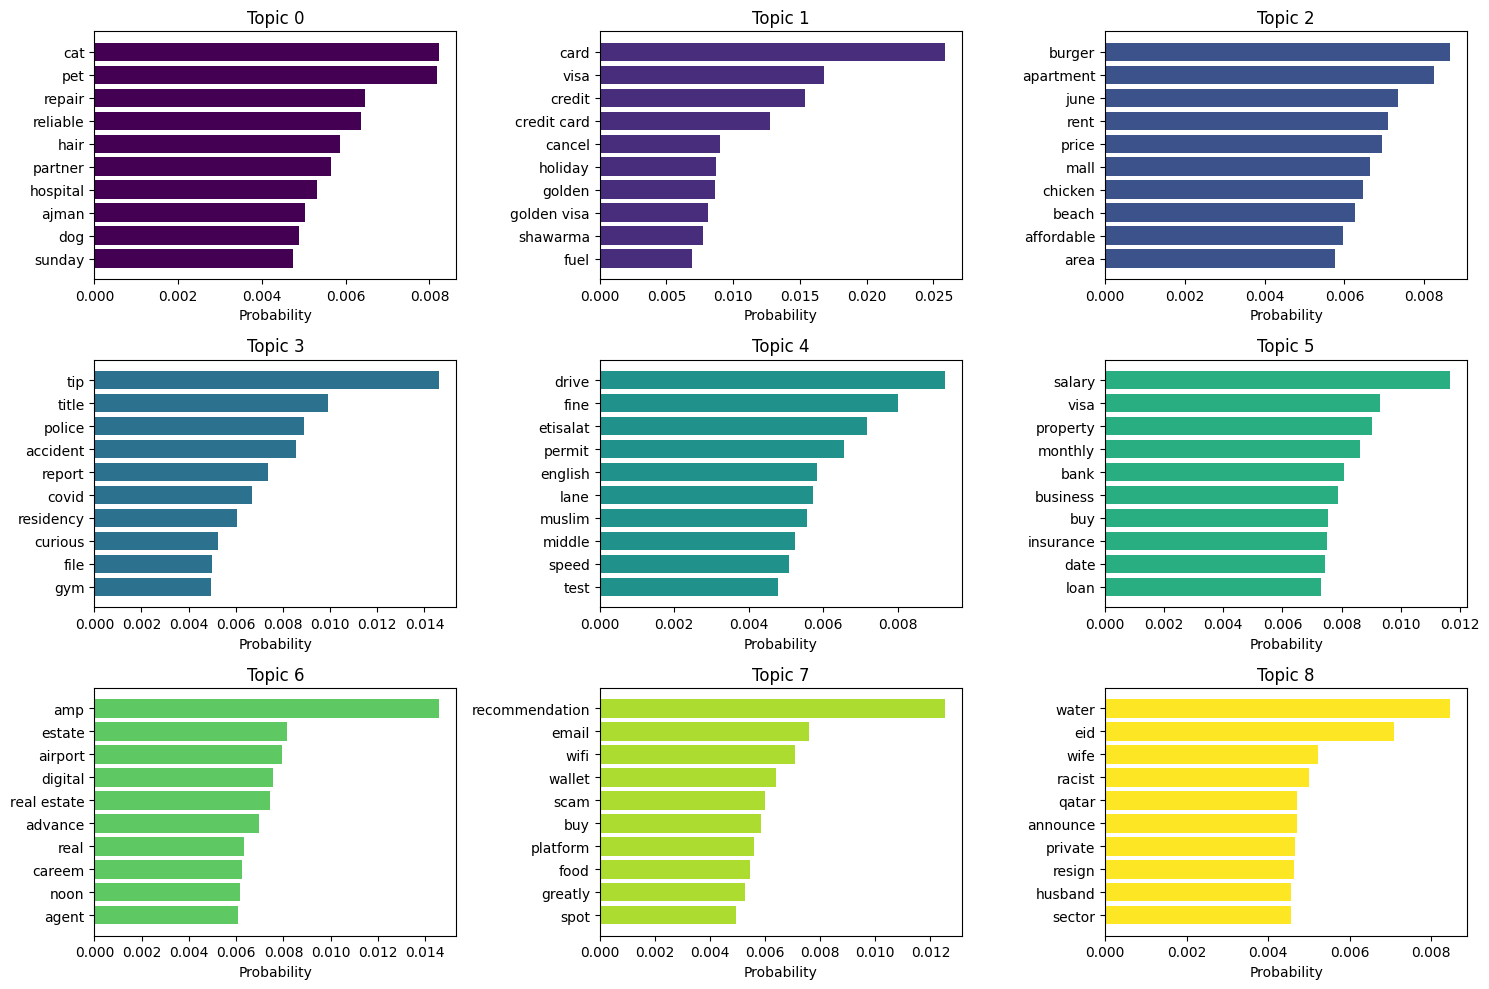

In [85]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#number of topics
num_topics = lda_model.num_topics

# Number of words to display for each topic
num_words = 10

#define color map
colors = cm.viridis(np.linspace(0,1, num_topics))

#subplot layout
rows = 3
cols = int(np.ceil(num_topics/rows))

plt.figure(figsize=(15,10))


# Iterate through the topics
for topic_num in range(num_topics):
    # top words and their probabilities for each topic
    top_words = lda_model.show_topic(topic_num, topn=num_words)
    
    # Separate the words and probabilities
    topic_words, probs = zip(*top_words)
    
    #create subplot
    plt.subplot(rows, cols, topic_num +1)
    
    # Plot the words and probabilities as a horizontal bar chart
    plt.barh(topic_words, probs, color = colors[topic_num])
    plt.xlabel('Probability')
    plt.title(f'Topic {topic_num}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest probability at the top

plt.tight_layout()
plt.show()